In [3]:
import torch
import numpy
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

from model.net import *
from utils.training import *
from data.data import *

## Experiment Config

In [4]:
model_path = os.path.join(os.getcwd(), "weights")

args = {
    'USE_CUDA': True if torch.cuda.is_available() else False,
    'BATCH_SIZE': 256,
    'N_EPOCHS': 30,
    'LEARNING_RATE_1': 1e-2,
    'LEARNING_RATE_2': 1e-2,
    'MOMENTUM': 0.9,
    'DATASET_NAME':'mnist',
    'LAMBDA_recon': 1,
    'LAMBDA_margin': 1,
    'LReLU_negative_slope':0.1,
    'WEIGHTDECAY':5e-6,
}

## Model Loading

In [6]:
# Config for 16 1d vectors in Capsule Layer. Set the Softmax Dimension to 1 in this case
class Config:
    def __init__(self, dataset='mnist'):
        # CNN (cnn)
        self.cnn_in_channels = 1
        self.cnn_out_channels = 12
        self.cnn_kernel_size = 15

        # Primary Capsule (pc)
        self.pc_num_capsules = 1
        self.pc_in_channels = 12
        self.pc_out_channels = 16
        self.pc_kernel_size = 8
        self.pc_num_routes = 1 * 7 * 7

        # Digit Capsule 1 (dc)
        self.dc_num_capsules = 49
        self.dc_num_routes = 7 * 7 #7*7*16
        self.dc_in_channels = 16
        self.dc_out_channels = 16 #1
        
        # Digit Capsule 2 (dc)
        self.dc_2_num_capsules = 10
        self.dc_2_num_routes = 7 * 7
        self.dc_2_in_channels = 16 #1
        self.dc_2_out_channels = 16

        # Decoder
        self.input_width = 28
        self.input_height = 28

torch.manual_seed(2)
config = Config()

net = CapsNet(args, config)


# net = torch.nn.DataParallel(net)


    
net.load_state_dict(torch.load(os.path.join(model_path, 'CapsNetMNIST_Recon_model2_iter2.pth'), map_location='cpu'))

# net.decoder.reconstraction_layers = nn.Sequential(
#             nn.Linear(16 * 10, 512),
#             nn.LeakyReLU(negative_slope=args['LReLU_negative_slope'], inplace=True),
#             nn.Linear(512, 1024),
#             nn.LeakyReLU(negative_slope=args['LReLU_negative_slope'], inplace=True),
#             nn.Linear(1024, 784),
#             nn.Sigmoid()
#         )

# # # # freeze All layers except Decoder
# to_freeze = [net.conv_layer, net.primary_capsules, net.digit_capsules_1, net.digit_capsules_2]
# for layer in to_freeze:
#     for param in layer.parameters():
#         param.requires_grad = False
#     layer.eval()
    
if args['USE_CUDA']:
    net = net.cuda()
    

## Loading Dataset

In [7]:
trainloader, testloader = dataset(args)

In [8]:
# for param in net.parameters():
#     if(param.requires_grad==True):
#         print(param.shape)
        
for data in trainloader:
    print(data[0].max())
    print(data[0].min())
    break
filter(lambda p: p.requires_grad, net.parameters())

tensor(2.8215)
tensor(-0.4242)


## Training CapsuleNet

  0%|          | 0/235 [00:00<?, ?it/s]

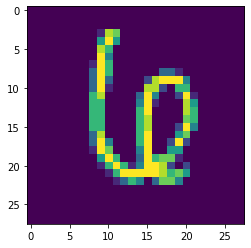

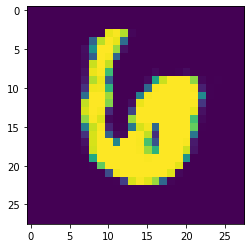

tensor([0.0060, 0.0096, 0.0197], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:23,  1.15it/s]

tensor([-8.1148e-05,  1.6635e-04,  1.2825e-02], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-1.4470e-08,  1.2729e-07, -7.6344e-08], device='cuda:0')
Epoch: [1/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.002023


 43%|████▎     | 100/235 [00:48<01:05,  2.06it/s]

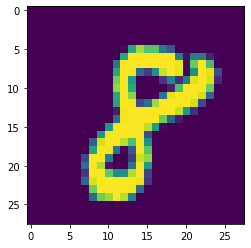

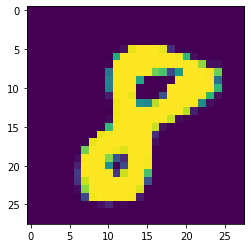

tensor([-0.0068,  0.0060, -0.0091], device='cuda:0', grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:48<01:13,  1.83it/s]

tensor([-0.0072,  0.0065, -0.0090], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-1.9514e-07,  3.6029e-07, -2.8679e-07], device='cuda:0')
Epoch: [1/30], Batch: [101/235], train accuracy: 0.996094, loss: 0.002101


 85%|████████▌ | 200/235 [01:43<00:19,  1.76it/s]

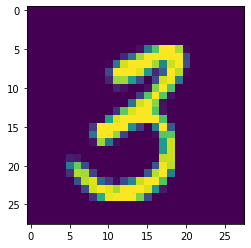

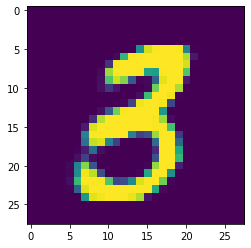

tensor([-0.0025,  0.0010, -0.0021], device='cuda:0', grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:44<00:21,  1.57it/s]

tensor([-0.0023,  0.0016, -0.0024], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 1.1053e-07, -2.3908e-07,  1.3924e-07], device='cuda:0')
Epoch: [1/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002013


100%|██████████| 235/235 [02:03<00:00,  1.91it/s]

Epoch: [1/30], train loss: 0.002071



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [1/30], test accuracy: 0.989400, loss: 0.554377


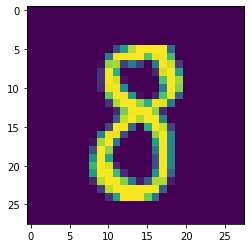

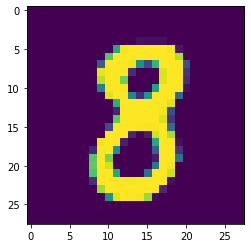

tensor([-0.0005,  0.0026, -0.0013], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:26,  1.13it/s]

tensor([-0.0008,  0.0027, -0.0014], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 2.7013e-08, -2.0324e-08, -1.3039e-08], device='cuda:0')
Epoch: [2/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.001997


 43%|████▎     | 100/235 [00:57<01:16,  1.77it/s]

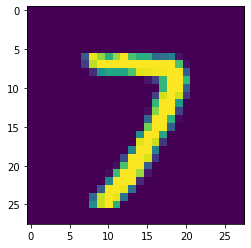

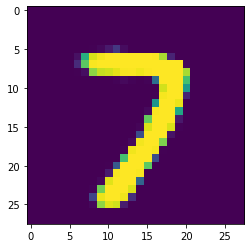

tensor([-0.0015,  0.0023, -0.0018], device='cuda:0', grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:23,  1.60it/s]

tensor([-0.0015,  0.0024, -0.0018], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-1.7554e-08,  2.3962e-08, -1.9691e-08], device='cuda:0')
Epoch: [2/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002009


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

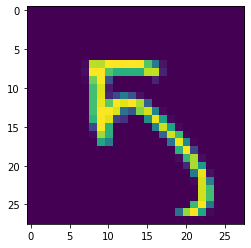

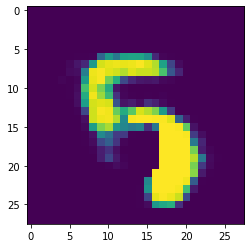

tensor([-0.0004,  0.0006, -0.0002], device='cuda:0', grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.56it/s]

tensor([-0.0005,  0.0007, -0.0004], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 1.6140e-08, -1.8530e-08,  2.7303e-08], device='cuda:0')
Epoch: [2/30], Batch: [201/235], train accuracy: 0.992188, loss: 0.002080


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [2/30], train loss: 0.002067



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [2/30], test accuracy: 0.990300, loss: 0.552727


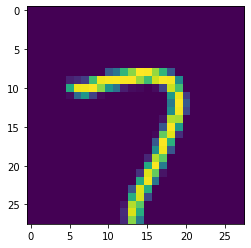

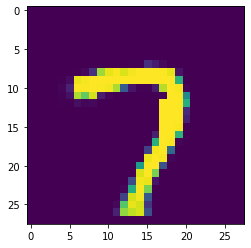

tensor([-0.0009,  0.0007, -0.0002], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:33,  1.09it/s]

tensor([-0.0008,  0.0006, -0.0002], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-9.9862e-09,  1.2233e-08, -8.0581e-09], device='cuda:0')
Epoch: [3/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.002089


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

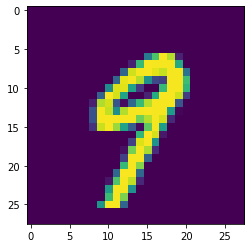

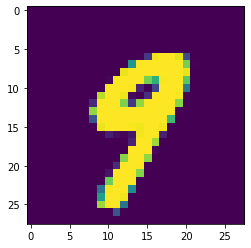

tensor([-1.1342e-04,  2.5141e-04, -9.6135e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:23,  1.60it/s]

tensor([-6.9466e-05,  2.2023e-04, -3.7059e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-2.9820e-09,  4.9576e-09, -2.4692e-09], device='cuda:0')
Epoch: [3/30], Batch: [101/235], train accuracy: 0.996094, loss: 0.002117


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

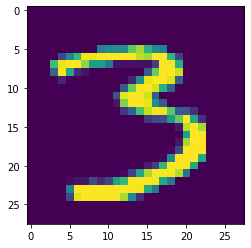

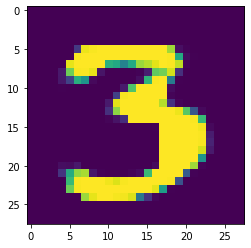

tensor([-5.3886e-05,  4.4984e-05, -6.6951e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.60it/s]

tensor([-4.8160e-05,  3.7772e-05, -6.9295e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-9.2051e-10,  1.0074e-09, -1.0232e-09], device='cuda:0')
Epoch: [3/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002011


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [3/30], train loss: 0.002066



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [3/30], test accuracy: 0.989800, loss: 0.553726


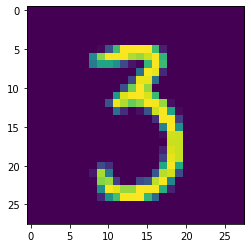

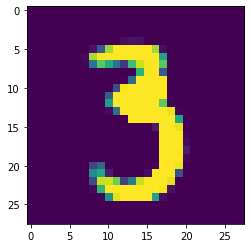

tensor([ 1.5718e-05, -1.9913e-06,  2.6519e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:26,  1.13it/s]

tensor([ 1.8167e-05, -8.8636e-06,  3.2238e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-1.7963e-10,  4.6528e-11, -1.7645e-10], device='cuda:0')
Epoch: [4/30], Batch: [1/235], train accuracy: 0.996094, loss: 0.002146


 43%|████▎     | 100/235 [00:57<01:16,  1.76it/s]

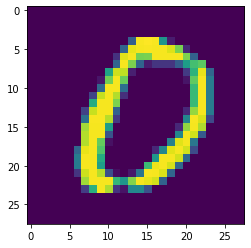

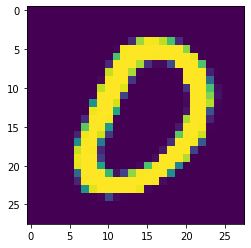

tensor([-2.7548e-05,  4.9356e-05, -1.4712e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:26,  1.55it/s]

tensor([-1.5966e-05,  4.3870e-05, -1.8951e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-1.2245e-09,  1.2403e-09, -1.0970e-09], device='cuda:0')
Epoch: [4/30], Batch: [101/235], train accuracy: 0.996094, loss: 0.002056


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

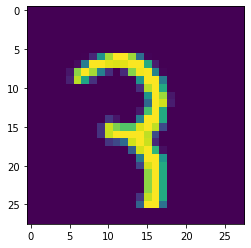

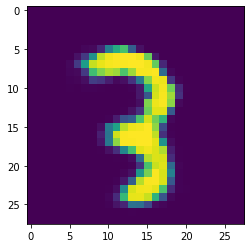

tensor([-0.0261,  0.0085, -0.0058], device='cuda:0', grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-0.0200,  0.0074, -0.0017], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-3.9184e-08, -2.2333e-08,  2.2328e-07], device='cuda:0')
Epoch: [4/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002117


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [4/30], train loss: 0.002067



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [4/30], test accuracy: 0.990800, loss: 0.552216


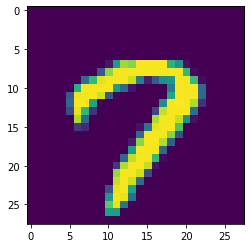

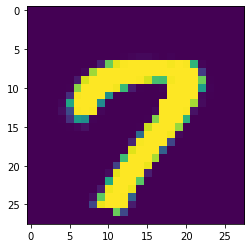

tensor([ 0.0040, -0.0005,  0.0074], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:27,  1.13it/s]

tensor([ 2.0258e-03, -8.3099e-05,  3.5158e-03], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-5.8969e-07,  8.1787e-07, -6.0513e-07], device='cuda:0')
Epoch: [5/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.002054


 43%|████▎     | 100/235 [00:57<01:16,  1.76it/s]

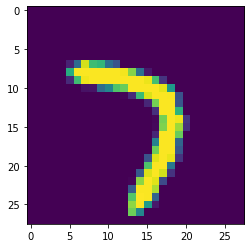

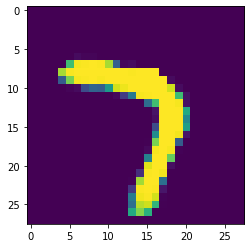

tensor([-0.0005,  0.0008, -0.0014], device='cuda:0', grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-0.0002,  0.0006, -0.0012], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-4.4704e-08,  7.1237e-08, -4.9275e-08], device='cuda:0')
Epoch: [5/30], Batch: [101/235], train accuracy: 0.996094, loss: 0.001997


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

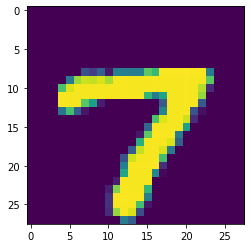

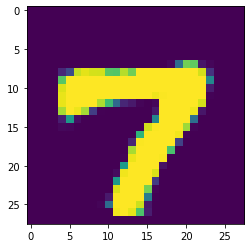

tensor([-0.0002,  0.0003, -0.0003], device='cuda:0', grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.60it/s]

tensor([-0.0002,  0.0002, -0.0002], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-2.0639e-09,  5.0463e-09, -2.7255e-09], device='cuda:0')
Epoch: [5/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002045


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [5/30], train loss: 0.002064



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [5/30], test accuracy: 0.991700, loss: 0.551187


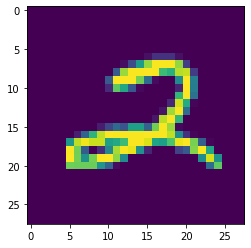

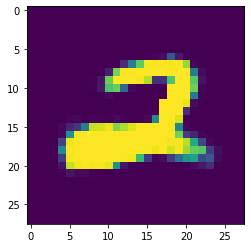

tensor([-0.0002,  0.0002, -0.0003], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:26,  1.13it/s]

tensor([-0.0002,  0.0002, -0.0003], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 2.7816e-09, -1.5849e-09,  2.5684e-09], device='cuda:0')
Epoch: [6/30], Batch: [1/235], train accuracy: 0.996094, loss: 0.002115


 43%|████▎     | 100/235 [00:57<01:16,  1.76it/s]

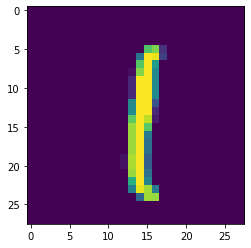

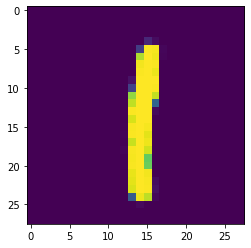

tensor([-3.9564e-05,  4.7507e-05, -1.3646e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:26,  1.55it/s]

tensor([-3.7345e-05,  4.4236e-05, -1.2134e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-1.3092e-10, -7.0991e-12, -6.7745e-11], device='cuda:0')
Epoch: [6/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002053


 85%|████████▌ | 200/235 [01:54<00:19,  1.76it/s]

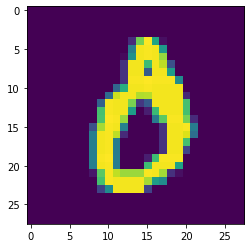

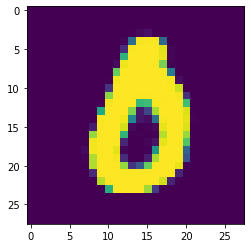

tensor([-6.0368e-06,  6.8397e-06, -5.5035e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-6.4451e-06,  7.1715e-06, -6.2722e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 7.4652e-11, -7.5226e-11,  7.0627e-11], device='cuda:0')
Epoch: [6/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002081


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [6/30], train loss: 0.002061



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [6/30], test accuracy: 0.991100, loss: 0.552968


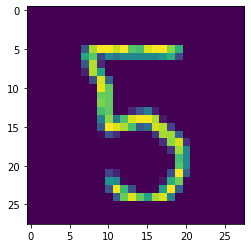

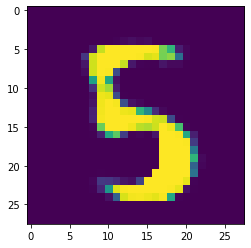

tensor([-7.8883e-07,  2.0060e-06, -2.6809e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:26,  1.13it/s]

tensor([-1.1296e-06,  2.4896e-06, -2.9041e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 7.8158e-11, -1.0662e-10,  9.1195e-11], device='cuda:0')
Epoch: [7/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.001985


 43%|████▎     | 100/235 [00:57<01:16,  1.76it/s]

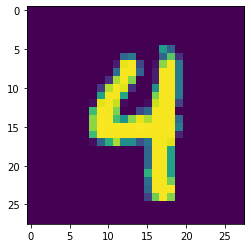

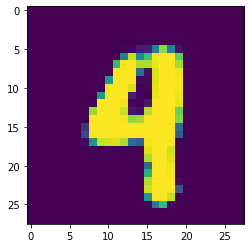

tensor([ 5.8448e-08,  3.0974e-07, -3.4091e-08], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([ 5.1636e-08,  3.1856e-07, -6.0718e-08], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 2.6942e-12, -6.7503e-12,  4.1040e-12], device='cuda:0')
Epoch: [7/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002059


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

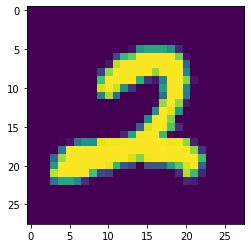

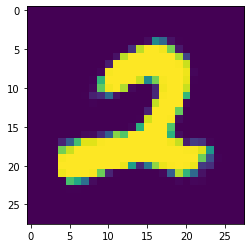

tensor([-1.1797e-05,  8.1863e-06, -8.0481e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-1.9204e-05,  1.8727e-05, -1.0397e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 9.4511e-10, -1.9933e-09, -1.1138e-10], device='cuda:0')
Epoch: [7/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002128


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [7/30], train loss: 0.002063



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [7/30], test accuracy: 0.990500, loss: 0.551572


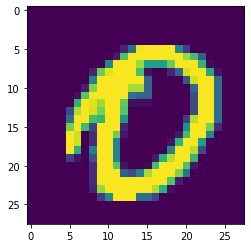

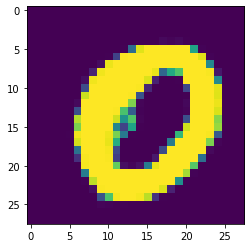

tensor([ 3.1808e-06, -4.8172e-05, -1.7186e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:25,  1.14it/s]

tensor([ 1.9313e-05, -6.9059e-05,  7.2578e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-1.7111e-09,  1.3155e-09, -1.7238e-09], device='cuda:0')
Epoch: [8/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.002080


 43%|████▎     | 100/235 [00:57<01:16,  1.76it/s]

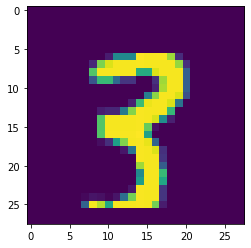

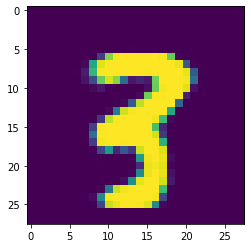

tensor([ 0.0149, -0.0124,  0.0178], device='cuda:0', grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:26,  1.55it/s]

tensor([ 0.0202, -0.0181,  0.0226], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 1.3449e-07, -1.4145e-07,  4.6734e-07], device='cuda:0')
Epoch: [8/30], Batch: [101/235], train accuracy: 0.996094, loss: 0.002086


 85%|████████▌ | 200/235 [01:54<00:19,  1.77it/s]

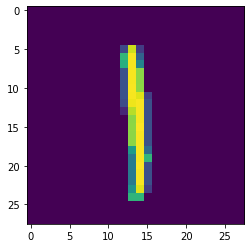

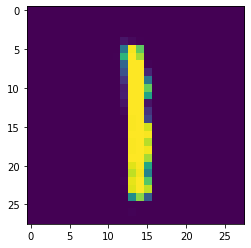

tensor([-0.0141,  0.0122, -0.0044], device='cuda:0', grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-0.0128,  0.0116, -0.0034], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-4.8369e-08,  1.4281e-07, -1.8397e-07], device='cuda:0')
Epoch: [8/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002025


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [8/30], train loss: 0.002060



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [8/30], test accuracy: 0.990700, loss: 0.552048


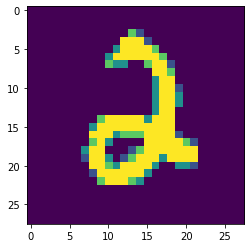

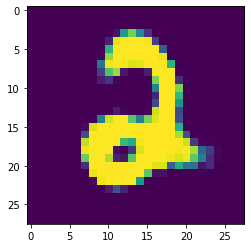

tensor([-0.0024,  0.0041, -0.0038], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:27,  1.13it/s]

tensor([-0.0025,  0.0042, -0.0040], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 2.4555e-08, -4.8867e-08,  2.6157e-08], device='cuda:0')
Epoch: [9/30], Batch: [1/235], train accuracy: 0.996094, loss: 0.002003


 43%|████▎     | 100/235 [00:57<01:16,  1.76it/s]

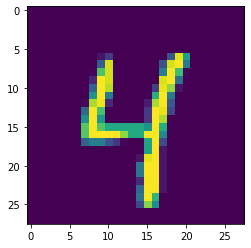

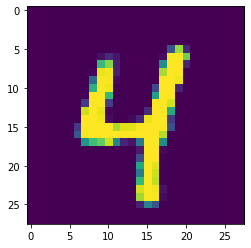

tensor([-0.0002,  0.0003, -0.0004], device='cuda:0', grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-0.0002,  0.0003, -0.0004], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 4.6582e-09, -4.1854e-09,  5.9733e-09], device='cuda:0')
Epoch: [9/30], Batch: [101/235], train accuracy: 0.996094, loss: 0.002056


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

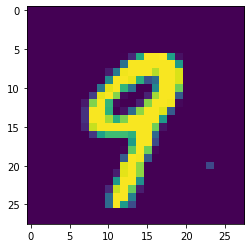

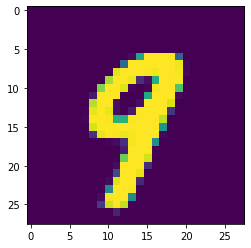

tensor([ 8.9629e-07,  2.2574e-05, -1.8737e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([ 2.9436e-06,  2.0869e-05, -1.5739e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 8.7905e-11, -4.5263e-11, -5.0995e-12], device='cuda:0')
Epoch: [9/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002065


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [9/30], train loss: 0.002060



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [9/30], test accuracy: 0.989000, loss: 0.554905


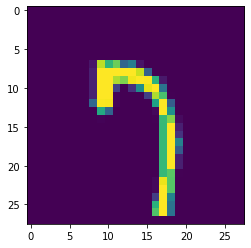

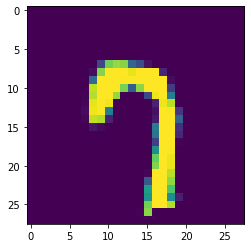

tensor([-2.1258e-05,  2.0291e-05, -1.4511e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:32,  1.10it/s]

tensor([-1.8215e-05,  1.7905e-05, -1.2299e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-1.1509e-10,  1.0083e-10, -5.9391e-11], device='cuda:0')
Epoch: [10/30], Batch: [1/235], train accuracy: 0.996094, loss: 0.002102


 43%|████▎     | 100/235 [00:57<01:16,  1.78it/s]

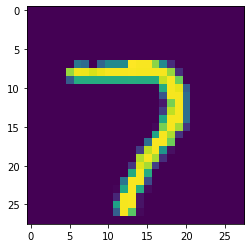

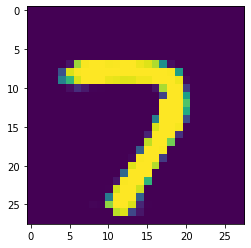

tensor([-2.4634e-08,  3.4275e-07, -4.1355e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:25,  1.56it/s]

tensor([-1.1354e-08,  2.7910e-07, -3.2888e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 4.0070e-13,  4.8857e-12, -2.3063e-12], device='cuda:0')
Epoch: [10/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002023


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

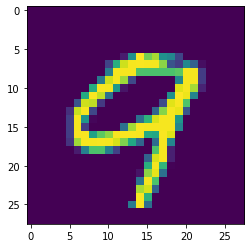

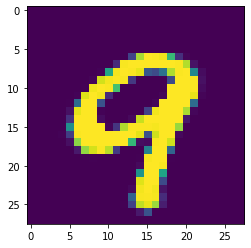

tensor([-5.0408e-08, -5.0557e-08,  1.4466e-08], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.60it/s]

tensor([-6.0776e-08, -4.4301e-08,  1.0721e-08], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-5.8575e-13,  8.5606e-13, -9.5103e-13], device='cuda:0')
Epoch: [10/30], Batch: [201/235], train accuracy: 0.992188, loss: 0.002074


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [10/30], train loss: 0.002058



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [10/30], test accuracy: 0.990800, loss: 0.551613


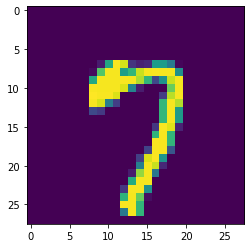

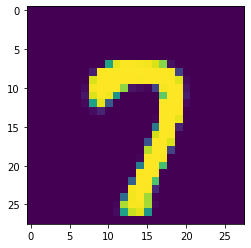

tensor([ 8.2871e-08, -3.0254e-08,  2.5280e-09], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:26,  1.14it/s]

tensor([ 7.1156e-08, -1.7192e-08, -7.8607e-09], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 6.0528e-12, -1.0638e-12,  1.2644e-12], device='cuda:0')
Epoch: [11/30], Batch: [1/235], train accuracy: 0.996094, loss: 0.002057


 43%|████▎     | 100/235 [00:57<01:16,  1.77it/s]

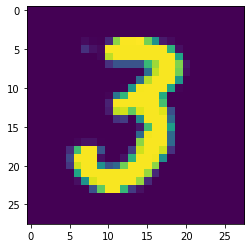

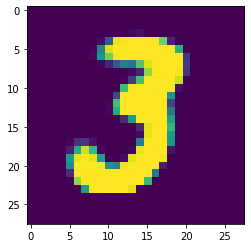

tensor([ 9.8741e-05, -1.5131e-04,  1.1188e-04], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([ 6.5409e-05, -1.2494e-04,  8.5792e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-5.4592e-10,  2.2769e-09, -7.9612e-10], device='cuda:0')
Epoch: [11/30], Batch: [101/235], train accuracy: 0.992188, loss: 0.002076


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

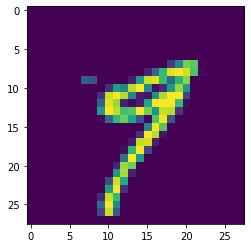

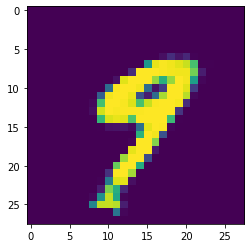

tensor([ 0.0124, -0.0272,  0.0150], device='cuda:0', grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.60it/s]

tensor([ 0.0047, -0.0199,  0.0079], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-4.3210e-07,  1.3728e-07, -1.8364e-07], device='cuda:0')
Epoch: [11/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002040


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [11/30], train loss: 0.002057



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [11/30], test accuracy: 0.990500, loss: 0.552686


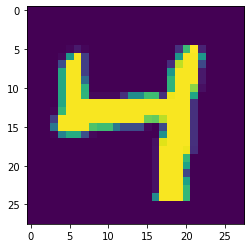

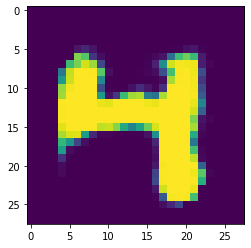

tensor([-0.0073,  0.0176, -0.0011], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:40,  1.06it/s]

tensor([-0.0115,  0.0190, -0.0058], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 1.0745e-07, -3.8299e-07,  5.6351e-07], device='cuda:0')
Epoch: [12/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.002056


 43%|████▎     | 100/235 [00:57<01:16,  1.76it/s]

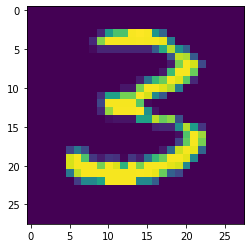

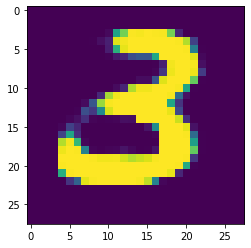

tensor([-0.0023,  0.0013, -0.0006], device='cuda:0', grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-0.0024,  0.0015, -0.0005], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 1.6556e-08, -3.3897e-08,  4.8626e-08], device='cuda:0')
Epoch: [12/30], Batch: [101/235], train accuracy: 0.996094, loss: 0.002078


 85%|████████▌ | 200/235 [01:54<00:19,  1.76it/s]

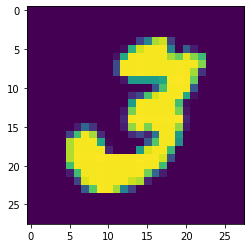

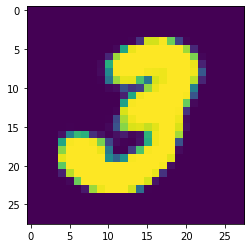

tensor([-4.8937e-05,  4.6859e-04, -5.4312e-04], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-0.0001,  0.0004, -0.0006], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 4.4582e-09, -7.8013e-09,  4.2321e-09], device='cuda:0')
Epoch: [12/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002026


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [12/30], train loss: 0.002056



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [12/30], test accuracy: 0.990700, loss: 0.549389


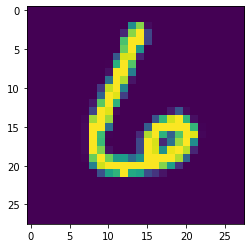

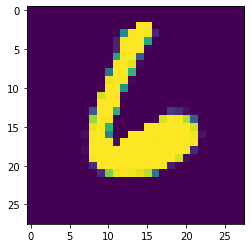

tensor([-0.0007,  0.0005, -0.0003], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:26,  1.13it/s]

tensor([-0.0007,  0.0005, -0.0003], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 5.2163e-09, -1.0486e-08, -9.2504e-10], device='cuda:0')
Epoch: [13/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.002084


 43%|████▎     | 100/235 [00:57<01:16,  1.76it/s]

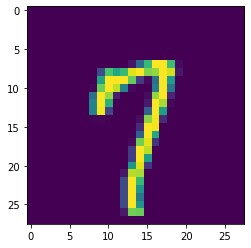

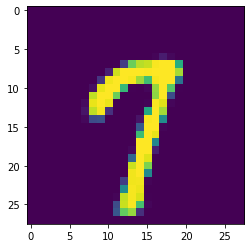

tensor([-0.0002,  0.0001, -0.0001], device='cuda:0', grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-0.0002,  0.0001, -0.0001], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 1.1286e-09, -2.8852e-10,  5.6699e-10], device='cuda:0')
Epoch: [13/30], Batch: [101/235], train accuracy: 0.996094, loss: 0.002048


 85%|████████▌ | 200/235 [01:54<00:19,  1.76it/s]

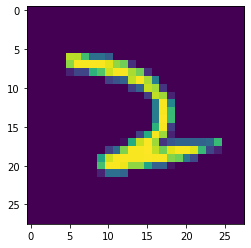

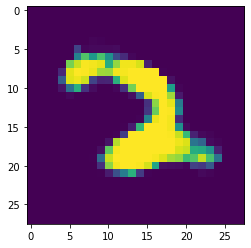

tensor([-1.5103e-05,  2.2736e-05, -2.1357e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-1.5768e-05,  2.3939e-05, -2.1500e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 5.4325e-10, -3.1876e-10,  3.9074e-10], device='cuda:0')
Epoch: [13/30], Batch: [201/235], train accuracy: 0.996094, loss: 0.002044


100%|██████████| 235/235 [02:13<00:00,  1.75it/s]

Epoch: [13/30], train loss: 0.002054



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [13/30], test accuracy: 0.991200, loss: 0.551665


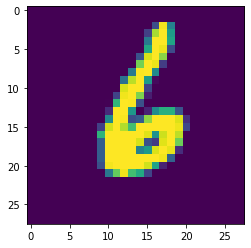

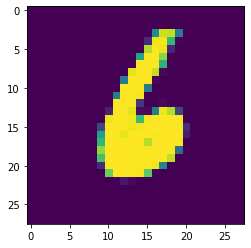

tensor([-2.5338e-05,  3.7046e-05, -2.4458e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:40,  1.06it/s]

tensor([-2.7707e-05,  3.7355e-05, -2.7621e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 1.3604e-10, -2.8591e-11,  2.9614e-10], device='cuda:0')
Epoch: [14/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.002060


 43%|████▎     | 100/235 [00:57<01:16,  1.76it/s]

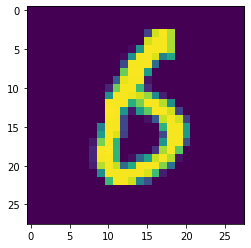

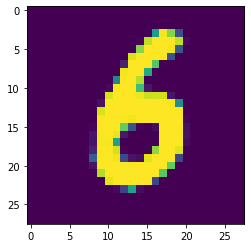

tensor([-9.8515e-07,  4.9645e-06,  1.0830e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-4.8542e-07,  4.8076e-06,  1.3906e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-1.8573e-11, -1.9570e-11,  1.5676e-11], device='cuda:0')
Epoch: [14/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002075


 85%|████████▌ | 200/235 [01:54<00:19,  1.76it/s]

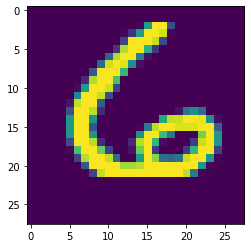

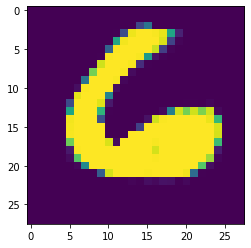

tensor([ 2.9937e-07,  2.1350e-06, -1.1086e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:55<00:21,  1.59it/s]

tensor([ 1.7075e-07,  2.0687e-06, -1.9462e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 8.0846e-12, -1.1246e-11,  1.6028e-11], device='cuda:0')
Epoch: [14/30], Batch: [201/235], train accuracy: 0.996094, loss: 0.002026


100%|██████████| 235/235 [02:14<00:00,  1.75it/s]

Epoch: [14/30], train loss: 0.002053



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [14/30], test accuracy: 0.991300, loss: 0.549570


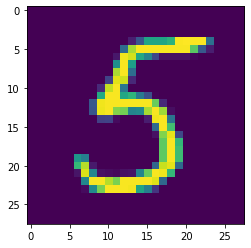

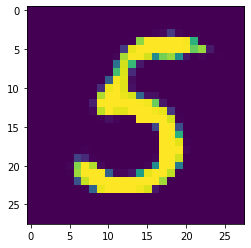

tensor([ 8.2647e-08,  1.4146e-07, -3.7648e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:26,  1.13it/s]

tensor([ 8.1198e-08,  1.3847e-07, -3.4866e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 9.0645e-12, -7.3156e-12,  4.4395e-12], device='cuda:0')
Epoch: [15/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.002064


 43%|████▎     | 100/235 [00:57<01:16,  1.77it/s]

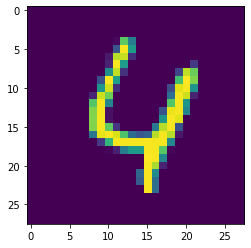

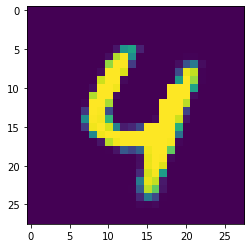

tensor([-5.0306e-08, -2.7536e-08, -9.5042e-08], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-4.7690e-08, -3.0044e-08, -9.6806e-08], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 2.0745e-13,  2.8571e-13, -3.8186e-13], device='cuda:0')
Epoch: [15/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002043


 85%|████████▌ | 200/235 [01:54<00:19,  1.77it/s]

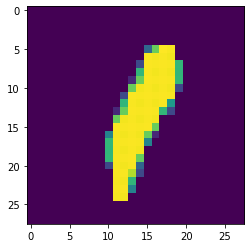

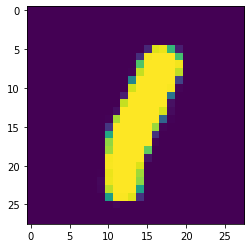

tensor([-1.3478e-09, -9.9997e-09, -1.1273e-08], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-1.9835e-09, -6.7429e-09, -1.0764e-08], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 1.6895e-13, -1.6420e-13,  1.1618e-13], device='cuda:0')
Epoch: [15/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002002


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [15/30], train loss: 0.002052



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [15/30], test accuracy: 0.990500, loss: 0.551228


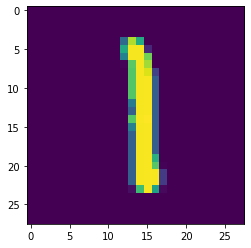

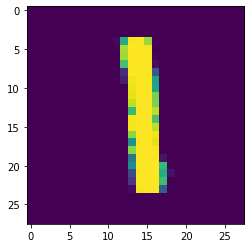

tensor([-5.1777e-09,  1.1088e-08, -6.7856e-09], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:39,  1.07it/s]

tensor([-4.8941e-09,  1.0825e-08, -7.0895e-09], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 2.9265e-14, -7.2263e-14,  9.5677e-14], device='cuda:0')
Epoch: [16/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.002071


 43%|████▎     | 100/235 [00:56<01:16,  1.76it/s]

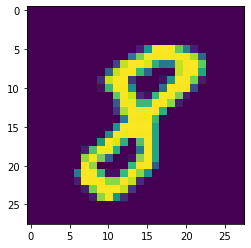

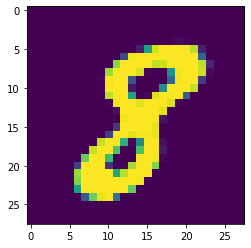

tensor([-1.5181e-09,  1.3281e-09, -1.2388e-09], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.58it/s]

tensor([-1.6647e-09,  1.5896e-09, -1.4393e-09], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 2.3087e-14, -1.8849e-14,  2.0437e-14], device='cuda:0')
Epoch: [16/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002080


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

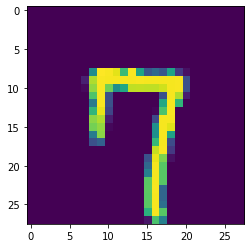

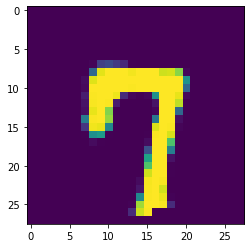

tensor([-9.4319e-11,  2.2335e-10, -1.9831e-10], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-4.9434e-11,  2.1190e-10, -1.7163e-10], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-8.7851e-16,  6.7064e-16, -1.2720e-15], device='cuda:0')
Epoch: [16/30], Batch: [201/235], train accuracy: 0.996094, loss: 0.002063


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [16/30], train loss: 0.002053



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [16/30], test accuracy: 0.989800, loss: 0.551577


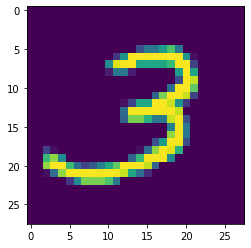

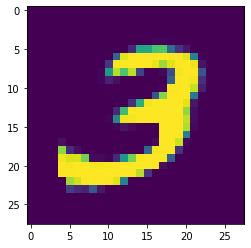

tensor([-1.1027e-10,  1.6936e-11, -6.5193e-11], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:27,  1.13it/s]

tensor([-1.1428e-10,  2.4968e-11, -6.9989e-11], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 1.4106e-17,  2.8865e-16, -8.2774e-17], device='cuda:0')
Epoch: [17/30], Batch: [1/235], train accuracy: 0.996094, loss: 0.001999


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

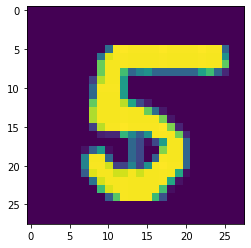

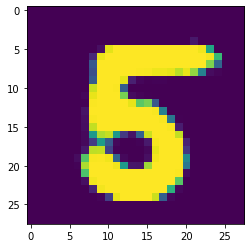

tensor([-1.1508e-12,  2.8267e-12, -2.6949e-12], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:23,  1.60it/s]

tensor([-7.6483e-13,  2.1642e-12, -2.1006e-12], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 6.8511e-17, -7.8404e-17,  2.7134e-17], device='cuda:0')
Epoch: [17/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002057


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

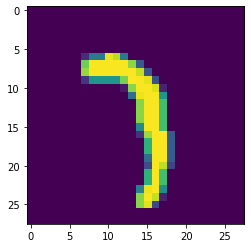

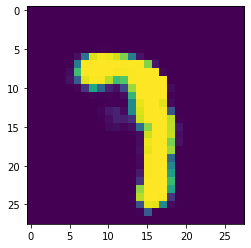

tensor([-5.5284e-12,  1.5303e-11, -6.7341e-12], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.60it/s]

tensor([-1.7985e-11,  2.6414e-11, -1.4515e-11], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 2.0182e-15, -2.9167e-15,  1.1774e-15], device='cuda:0')
Epoch: [17/30], Batch: [201/235], train accuracy: 0.992188, loss: 0.002077


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [17/30], train loss: 0.002052



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [17/30], test accuracy: 0.989800, loss: 0.551982


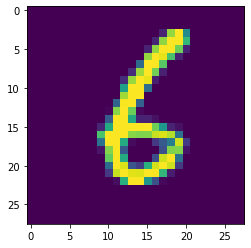

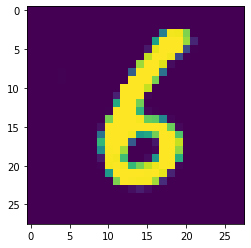

tensor([ 2.6136e-10, -5.4537e-10, -1.0976e-10], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:38,  1.07it/s]

tensor([ 4.0197e-10, -7.3206e-10, -3.0635e-11], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-4.7476e-15,  1.6193e-15, -6.3866e-15], device='cuda:0')
Epoch: [18/30], Batch: [1/235], train accuracy: 0.996094, loss: 0.002037


 43%|████▎     | 100/235 [00:57<01:16,  1.76it/s]

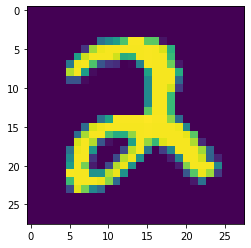

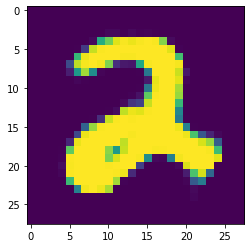

tensor([6.8179e-08, 9.1435e-08, 1.5400e-08], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-1.3762e-08,  1.4945e-07, -1.1343e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 4.9861e-12, -6.7360e-12,  1.0656e-11], device='cuda:0')
Epoch: [18/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002075


 85%|████████▌ | 200/235 [01:53<00:19,  1.76it/s]

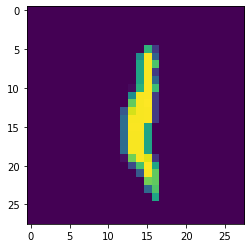

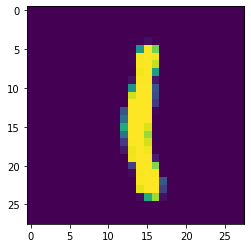

tensor([3.4912e-05, 1.6840e-03, 5.8834e-04], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([0.0001, 0.0017, 0.0007], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-7.0620e-09,  4.1238e-09, -9.2777e-09], device='cuda:0')
Epoch: [18/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.001994


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [18/30], train loss: 0.002050



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [18/30], test accuracy: 0.990700, loss: 0.551444


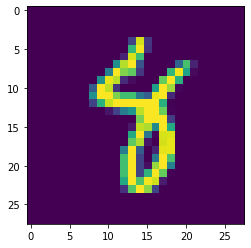

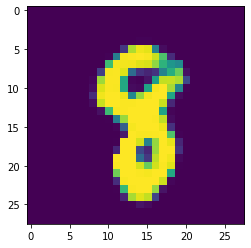

tensor([ 0.0030, -0.0034,  0.0002], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:26,  1.13it/s]

tensor([ 0.0041, -0.0044,  0.0007], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-3.4797e-07,  3.1632e-07, -3.7928e-07], device='cuda:0')
Epoch: [19/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.002018


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

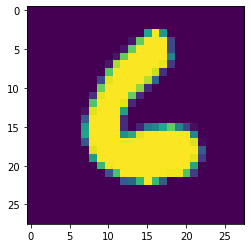

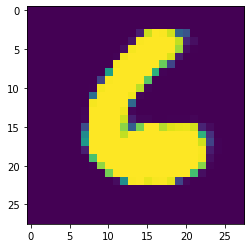

tensor([-0.0029, -0.0114,  0.0194], device='cuda:0', grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-0.0047, -0.0069,  0.0165], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-1.0337e-08, -1.9277e-07, -6.6188e-08], device='cuda:0')
Epoch: [19/30], Batch: [101/235], train accuracy: 0.996094, loss: 0.002067


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

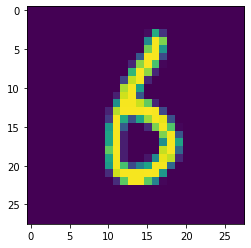

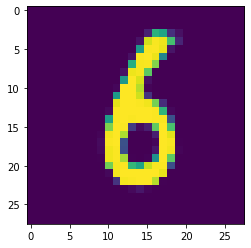

tensor([-0.0005,  0.0009, -0.0020], device='cuda:0', grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.60it/s]

tensor([-0.0004,  0.0008, -0.0020], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-3.4922e-08,  3.2920e-08, -2.7804e-08], device='cuda:0')
Epoch: [19/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002084


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [19/30], train loss: 0.002049



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [19/30], test accuracy: 0.991300, loss: 0.550641


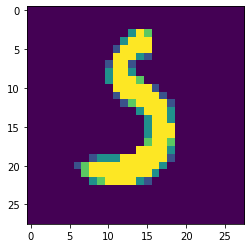

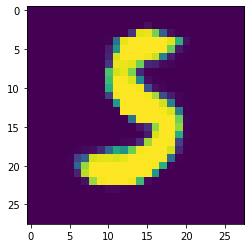

tensor([-0.0019,  0.0025, -0.0026], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:39,  1.07it/s]

tensor([-0.0019,  0.0026, -0.0025], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 1.8834e-08, -2.2180e-08,  3.0757e-08], device='cuda:0')
Epoch: [20/30], Batch: [1/235], train accuracy: 0.996094, loss: 0.002099


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

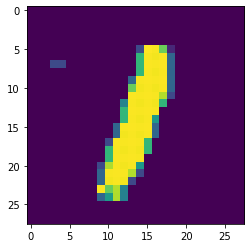

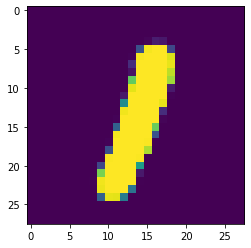

tensor([-0.0003,  0.0004, -0.0003], device='cuda:0', grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:23,  1.60it/s]

tensor([-0.0002,  0.0004, -0.0002], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-3.0126e-10,  1.5564e-09, -1.4226e-09], device='cuda:0')
Epoch: [20/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002023


 85%|████████▌ | 200/235 [01:53<00:19,  1.76it/s]

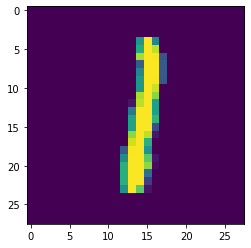

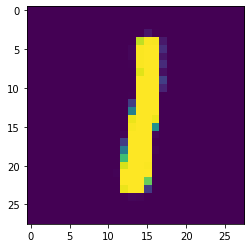

tensor([-9.5240e-05,  1.3568e-04, -2.4140e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-9.9816e-05,  1.4329e-04, -3.2316e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 9.0485e-10, -1.4728e-09, -7.8007e-11], device='cuda:0')
Epoch: [20/30], Batch: [201/235], train accuracy: 0.996094, loss: 0.002061


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [20/30], train loss: 0.002049



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [20/30], test accuracy: 0.990900, loss: 0.549354


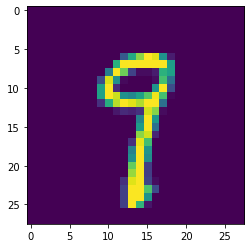

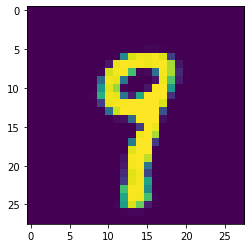

tensor([-1.0436e-04,  8.0573e-05, -6.4399e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:28,  1.12it/s]

tensor([-9.9097e-05,  7.9433e-05, -6.1704e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 1.4125e-09, -3.5749e-09,  1.8311e-09], device='cuda:0')
Epoch: [21/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.001995


 43%|████▎     | 100/235 [00:56<01:16,  1.78it/s]

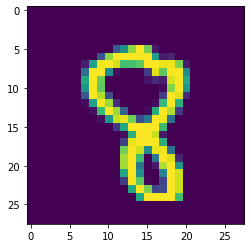

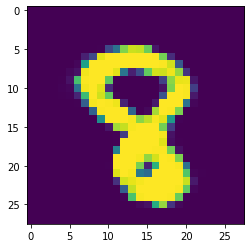

tensor([ 7.4932e-07, -7.0851e-06,  4.1580e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:23,  1.60it/s]

tensor([ 3.3256e-06, -9.1937e-06,  6.2277e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-1.4995e-10, -2.7730e-10, -4.1575e-10], device='cuda:0')
Epoch: [21/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002054


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

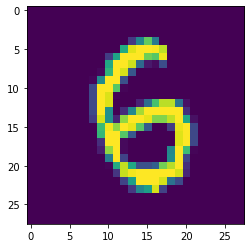

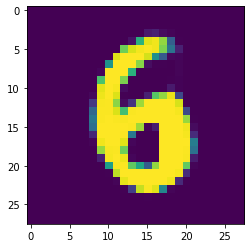

tensor([-1.9927e-08, -2.4749e-06, -2.1655e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.60it/s]

tensor([ 3.9703e-08, -2.5838e-06, -2.2196e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-9.1149e-11,  1.0437e-10, -1.6182e-10], device='cuda:0')
Epoch: [21/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002003


100%|██████████| 235/235 [02:13<00:00,  1.77it/s]

Epoch: [21/30], train loss: 0.002048



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [21/30], test accuracy: 0.990900, loss: 0.549577


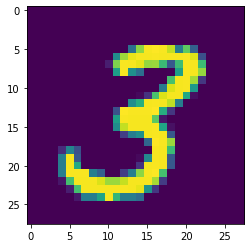

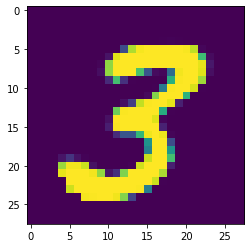

tensor([ 4.1071e-06, -3.1863e-06,  4.0196e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:39,  1.07it/s]

tensor([ 3.7266e-06, -2.7294e-06,  3.5276e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 9.7193e-11, -1.3779e-10,  1.6676e-10], device='cuda:0')
Epoch: [22/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.002082


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

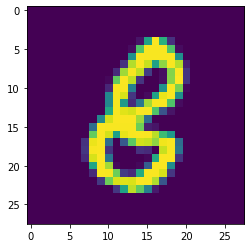

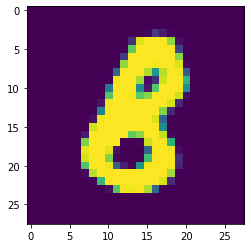

tensor([-3.2768e-06,  2.7838e-06, -3.7246e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:23,  1.60it/s]

tensor([-3.2016e-06,  2.7228e-06, -3.7047e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-7.7005e-12, -2.8559e-11,  2.6327e-12], device='cuda:0')
Epoch: [22/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002029


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

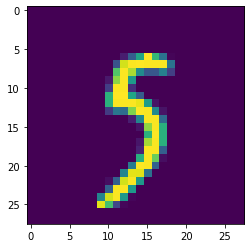

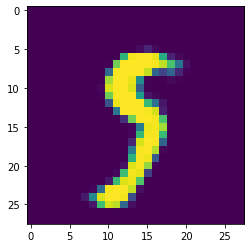

tensor([4.8014e-07, 2.1771e-07, 6.5597e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.60it/s]

tensor([4.2518e-07, 2.7864e-07, 5.8456e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 2.9808e-12, -7.7849e-12,  2.9719e-12], device='cuda:0')
Epoch: [22/30], Batch: [201/235], train accuracy: 0.996094, loss: 0.002094


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [22/30], train loss: 0.002047



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [22/30], test accuracy: 0.990400, loss: 0.550089


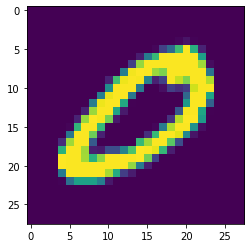

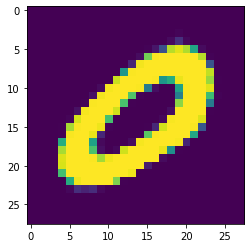

tensor([ 7.8416e-08, -5.4548e-07,  4.1062e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:26,  1.13it/s]

tensor([ 1.0710e-07, -5.6480e-07,  4.3639e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-4.3533e-12,  1.5826e-12, -2.5798e-12], device='cuda:0')
Epoch: [23/30], Batch: [1/235], train accuracy: 0.996094, loss: 0.002080


 43%|████▎     | 100/235 [00:56<01:16,  1.76it/s]

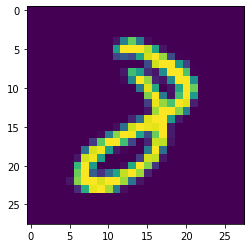

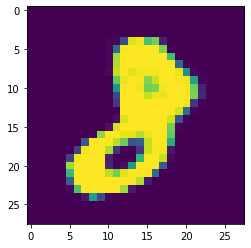

tensor([-4.4854e-08,  1.4107e-07, -9.8793e-08], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-5.1814e-08,  1.3594e-07, -1.0630e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 4.0802e-12, -5.6385e-12,  3.6997e-12], device='cuda:0')
Epoch: [23/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002111


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

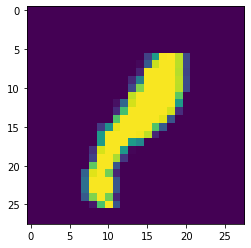

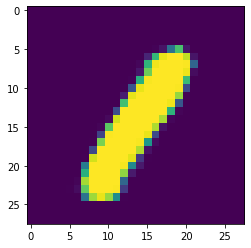

tensor([-6.9041e-09, -9.3256e-09, -1.4514e-08], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-5.6516e-09, -9.3943e-09, -1.2542e-08], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-5.3597e-14,  1.3793e-13, -1.8816e-13], device='cuda:0')
Epoch: [23/30], Batch: [201/235], train accuracy: 0.996094, loss: 0.002068


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [23/30], train loss: 0.002047



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [23/30], test accuracy: 0.990500, loss: 0.549991


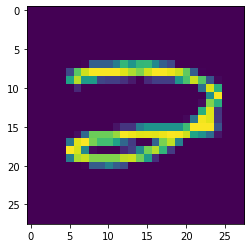

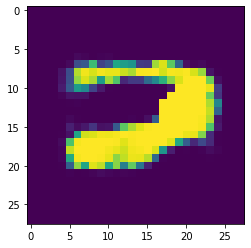

tensor([-5.3650e-09,  7.6827e-09, -6.7947e-09], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:39,  1.07it/s]

tensor([-6.4093e-09,  9.4936e-09, -7.6537e-09], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 6.2002e-13, -8.5431e-13,  5.7176e-13], device='cuda:0')
Epoch: [24/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.001960


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

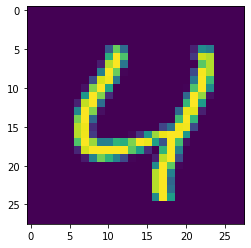

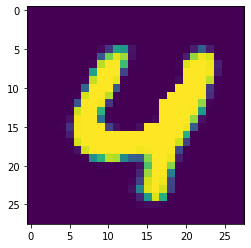

tensor([-1.8226e-09,  2.7899e-09, -1.6490e-09], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:23,  1.60it/s]

tensor([-1.7304e-09,  2.7827e-09, -1.5937e-09], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-1.3028e-15, -2.5728e-14, -1.3228e-14], device='cuda:0')
Epoch: [24/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002043


 85%|████████▌ | 200/235 [01:53<00:19,  1.76it/s]

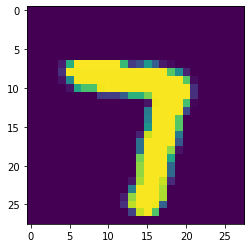

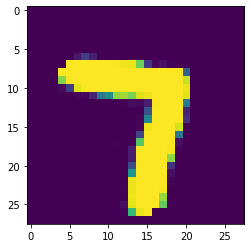

tensor([-1.3565e-10,  1.4482e-10, -1.4508e-10], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-1.4003e-10,  1.3788e-10, -1.4516e-10], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-8.5494e-17,  4.6796e-16, -1.0509e-15], device='cuda:0')
Epoch: [24/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002034


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [24/30], train loss: 0.002044



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [24/30], test accuracy: 0.990700, loss: 0.550068


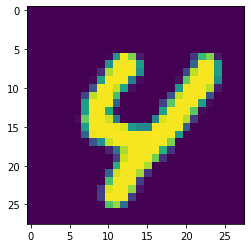

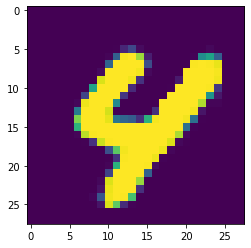

tensor([-1.0941e-10,  1.5046e-10, -1.3239e-10], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:27,  1.13it/s]

tensor([-1.0712e-10,  1.4919e-10, -1.3505e-10], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-1.4567e-15,  2.2524e-15, -1.7769e-15], device='cuda:0')
Epoch: [25/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.002016


 43%|████▎     | 100/235 [00:57<01:16,  1.76it/s]

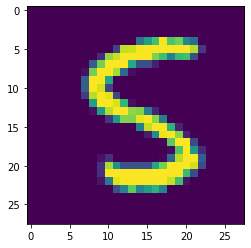

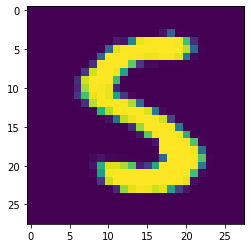

tensor([ 6.8581e-08, -1.6213e-08,  6.1501e-08], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([ 7.6238e-08, -2.2029e-08,  6.7125e-08], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 4.7177e-13, -1.2397e-13,  6.8497e-13], device='cuda:0')
Epoch: [25/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002080


 85%|████████▌ | 200/235 [01:54<00:19,  1.76it/s]

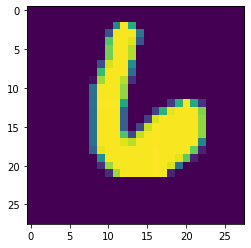

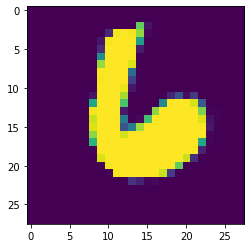

tensor([ 1.7493e-03, -5.5711e-05,  3.8640e-04], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([ 1.9437e-03, -4.9949e-05,  4.5747e-04], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 1.8627e-08, -2.3360e-08,  2.3730e-08], device='cuda:0')
Epoch: [25/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002001


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [25/30], train loss: 0.002043



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [25/30], test accuracy: 0.991300, loss: 0.549647


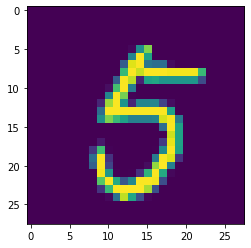

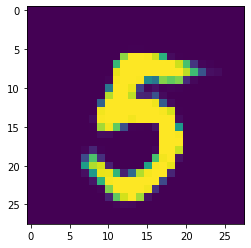

tensor([ 0.0083, -0.0165,  0.0049], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:40,  1.06it/s]

tensor([ 0.0056, -0.0120,  0.0006], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 4.8226e-07, -9.7270e-07,  5.6832e-07], device='cuda:0')
Epoch: [26/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.001981


 43%|████▎     | 100/235 [00:57<01:16,  1.76it/s]

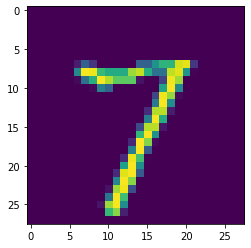

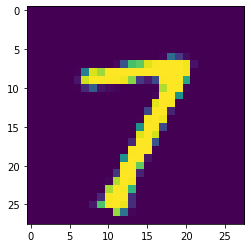

tensor([-0.0035,  0.0106, -0.0029], device='cuda:0', grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-0.0025,  0.0101, -0.0018], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 5.5538e-08, -6.7438e-08,  5.5573e-08], device='cuda:0')
Epoch: [26/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002038


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

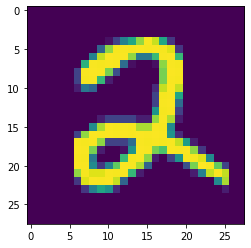

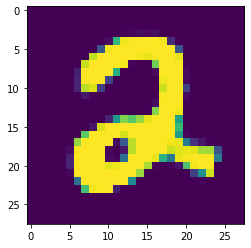

tensor([-0.0008,  0.0008, -0.0009], device='cuda:0', grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-0.0008,  0.0008, -0.0009], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 2.9938e-08, -3.8852e-08,  3.0628e-08], device='cuda:0')
Epoch: [26/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002054


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [26/30], train loss: 0.002042



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [26/30], test accuracy: 0.991100, loss: 0.550667


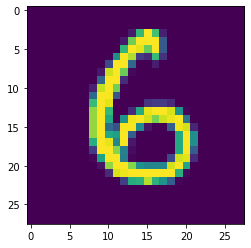

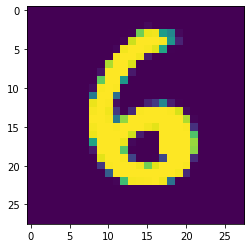

tensor([-0.0004,  0.0008, -0.0004], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:26,  1.13it/s]

tensor([-0.0005,  0.0008, -0.0005], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 6.0835e-09, -8.2758e-09,  2.3514e-09], device='cuda:0')
Epoch: [27/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.002038


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

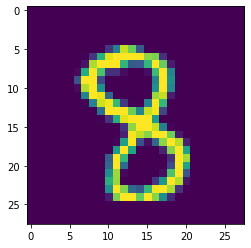

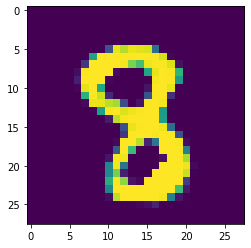

tensor([-0.0002,  0.0002, -0.0001], device='cuda:0', grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.60it/s]

tensor([-0.0002,  0.0002, -0.0001], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-4.3063e-09,  3.7222e-09, -4.0050e-09], device='cuda:0')
Epoch: [27/30], Batch: [101/235], train accuracy: 0.996094, loss: 0.002106


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

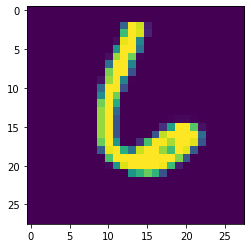

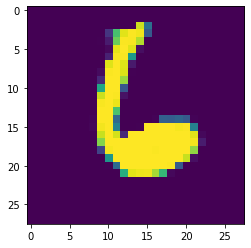

tensor([-2.1234e-05,  3.8415e-05, -3.4814e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.60it/s]

tensor([-1.6705e-05,  3.6514e-05, -3.1399e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-3.0533e-10,  1.9512e-10, -1.8818e-10], device='cuda:0')
Epoch: [27/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002040


100%|██████████| 235/235 [02:13<00:00,  1.77it/s]

Epoch: [27/30], train loss: 0.002041



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [27/30], test accuracy: 0.991300, loss: 0.549860


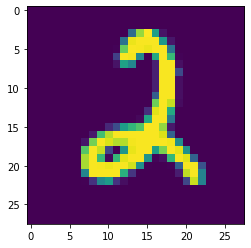

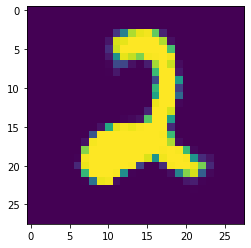

tensor([-1.2374e-05,  1.7684e-05, -1.2431e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:40,  1.06it/s]

tensor([-1.1268e-05,  1.5679e-05, -1.1421e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-3.1162e-10,  1.2711e-10, -3.8897e-10], device='cuda:0')
Epoch: [28/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.001992


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

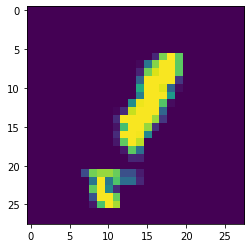

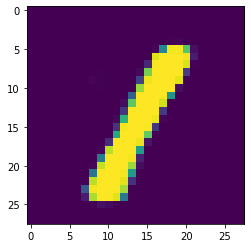

tensor([-6.3211e-06,  1.0168e-05, -4.9169e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-7.6184e-06,  1.1563e-05, -6.3094e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 1.7809e-10, -1.9187e-10,  1.4296e-10], device='cuda:0')
Epoch: [28/30], Batch: [101/235], train accuracy: 0.992188, loss: 0.002057


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

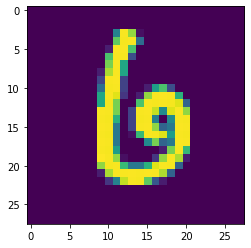

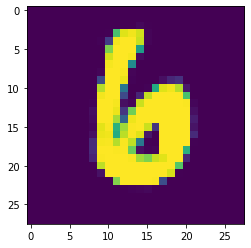

tensor([-2.8176e-06,  2.5350e-06, -2.7662e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-2.5946e-06,  2.4777e-06, -2.7012e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-5.1615e-11,  2.2537e-11, -2.0693e-11], device='cuda:0')
Epoch: [28/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.001973


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [28/30], train loss: 0.002042



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [28/30], test accuracy: 0.991800, loss: 0.550390


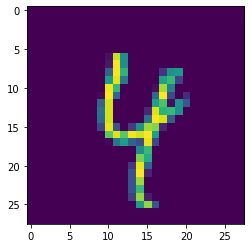

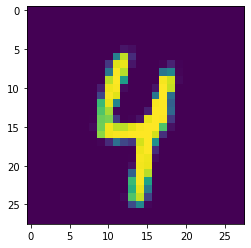

tensor([ 9.1668e-07, -5.3937e-07,  1.7698e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:25,  1.14it/s]

tensor([ 7.4092e-07, -4.3618e-07,  1.5611e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 2.8811e-11, -2.1453e-11,  2.7999e-11], device='cuda:0')
Epoch: [29/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.002052


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

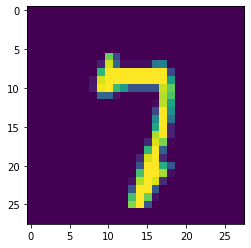

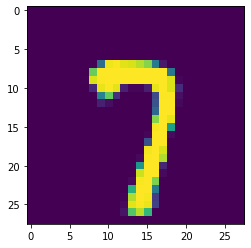

tensor([-2.9572e-07,  1.8598e-07, -2.3738e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:23,  1.60it/s]

tensor([-3.0187e-07,  2.0734e-07, -2.3760e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 3.4616e-12, -4.5789e-12,  6.6020e-12], device='cuda:0')
Epoch: [29/30], Batch: [101/235], train accuracy: 0.996094, loss: 0.002081


 85%|████████▌ | 200/235 [01:53<00:19,  1.76it/s]

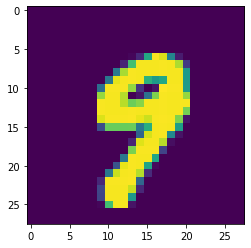

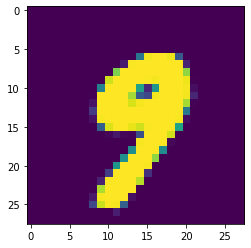

tensor([ 5.3704e-08, -3.8473e-08,  5.8499e-08], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([ 5.6382e-08, -4.8118e-08,  6.3979e-08], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-1.5935e-12,  2.4119e-12, -1.5453e-12], device='cuda:0')
Epoch: [29/30], Batch: [201/235], train accuracy: 0.996094, loss: 0.002083


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [29/30], train loss: 0.002041



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [29/30], test accuracy: 0.990800, loss: 0.549344


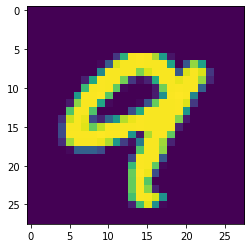

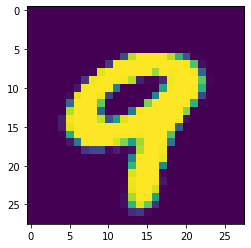

tensor([ 1.1591e-08, -1.8717e-08,  9.1313e-09], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:45,  1.04it/s]

tensor([ 1.3954e-08, -2.0500e-08,  1.1645e-08], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 4.5196e-13, -5.6072e-13,  6.7379e-13], device='cuda:0')
Epoch: [30/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.001987


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

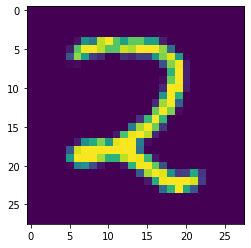

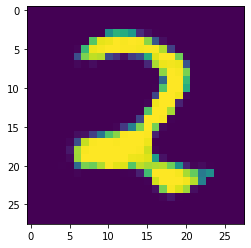

tensor([-8.9005e-09,  1.7034e-08, -1.1417e-08], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:23,  1.60it/s]

tensor([-8.6317e-09,  1.6975e-08, -1.1512e-08], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-2.4965e-14, -3.8738e-14,  3.6391e-14], device='cuda:0')
Epoch: [30/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002048


 85%|████████▌ | 200/235 [01:53<00:19,  1.76it/s]

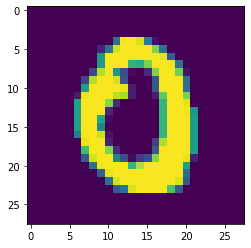

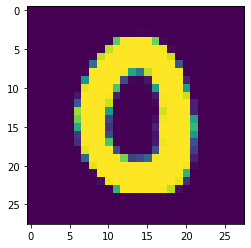

tensor([-1.6314e-09,  2.1724e-09, -1.6952e-09], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-1.3776e-09,  1.9500e-09, -1.3902e-09], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-1.0985e-14,  9.2972e-15, -2.5641e-14], device='cuda:0')
Epoch: [30/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002063


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [30/30], train loss: 0.002040


Epoch: [30/30], test accuracy: 0.991400, loss: 0.550076


In [10]:
optimizer_recon = torch.optim.Adam(net.decoder.parameters(), lr=args['LEARNING_RATE_2'], weight_decay=args['WEIGHTDECAY'])
optimizer_class = torch.optim.Adam([
                {'params': net.conv_layer.parameters()},
                {'params': net.primary_capsules.parameters()},
                {'params': net.digit_capsules_1.parameters()},
                {'params': net.digit_capsules_2.parameters()},
            ], lr=args['LEARNING_RATE_1'])


def imshow(img):
#     img = img * 0.3081 + 0.1307     # unnormalize
    npimg = img.detach().cpu().numpy()
#     plt.imshow(np.transpose(npimg)#, (1, 2, 0)))
    plt.imshow(npimg)
    plt.show()

def train_CapsNet(model, optimizer_class, optimizer_recon, train_loader, epoch, args):
    capsule_net = model
    capsule_net.train()
    n_batch = len(train_loader)
    total_loss = 0
    for batch_id, (data, target) in enumerate(tqdm(train_loader)):
        target = torch.sparse.torch.eye(10).index_select(dim=0, index=target)
        if(args['USE_CUDA']):
            data, target = data.cuda(), target.cuda()

        optimizer_class.zero_grad()
        optimizer_recon.zero_grad()
        output, reconstructions, masked = capsule_net(data)
        loss = capsule_net.loss(data, output, target, reconstructions)
        if(batch_id%100==0):
            img1 = data[0].reshape(28,28)
            img2 = reconstructions[0].reshape(28, 28)
            imshow(img1)
            imshow(img2)
            print(capsule_net.decoder.reconstraction_layers[0].weight[0][:3])
        loss.backward()
        optimizer_class.step()
        optimizer_recon.step()
        if(batch_id%100==0):
            print(capsule_net.decoder.reconstraction_layers[0].weight[0][:3])
            print("the grads are", capsule_net.decoder.reconstraction_layers[0].weight.grad[0][:3].data)
        correct = torch.sum(torch.argmax(masked, 1) == torch.argmax(target, 1))
        train_loss = loss.item()
        total_loss += train_loss
        if batch_id % 100 == 0:
            tqdm.write("Epoch: [{}/{}], Batch: [{}/{}], train accuracy: {:.6f}, loss: {:.6f}".format(
                epoch,
                args['N_EPOCHS'],
                batch_id + 1,
                n_batch,
                correct / float(args['BATCH_SIZE']),
                train_loss / float(args['BATCH_SIZE'])
                ))
    tqdm.write('Epoch: [{}/{}], train loss: {:.6f}'.format(epoch,args['N_EPOCHS'],total_loss / len(train_loader.dataset)))
    
def test_CapsNet(capsule_net, test_loader, epoch, args):
    capsule_net.eval()
    test_loss = 0
    correct = 0
    for batch_id, (data, target) in enumerate(test_loader):

        target = torch.sparse.torch.eye(10).index_select(dim=0, index=target)
        if args['USE_CUDA']:
            data, target = data.cuda(), target.cuda()

        output, reconstructions, masked = capsule_net(data)
        loss = capsule_net.loss(data, output, target, reconstructions)

        test_loss += loss.item()
        correct += torch.sum(torch.argmax(masked, 1) == torch.argmax(target, 1))

    tqdm.write(
        "Epoch: [{}/{}], test accuracy: {:.6f}, loss: {:.6f}".format(epoch, args['N_EPOCHS'], correct / len(test_loader.dataset),
                                                                  test_loss / len(test_loader)))

for e in range(1, args['N_EPOCHS'] + 1):
    train_CapsNet(net, optimizer_class, optimizer_recon, trainloader, e, args)
    test_CapsNet(net, testloader, e, args)

In [11]:
torch.save(net.state_dict(), os.path.join(model_path, "./CapsNetMNIST_Recon_model2_iter2.pth"))

In [6]:
for param in net.parameters():
    if(param.requires_grad==True):
        print(param.shape)

torch.Size([12, 1, 15, 15])
torch.Size([12])
torch.Size([16, 12, 8, 8])
torch.Size([16])
torch.Size([1, 784, 49, 16, 1])
torch.Size([1, 49, 10, 16, 16])
torch.Size([512, 160])
torch.Size([512])
torch.Size([1024, 512])
torch.Size([1024])
torch.Size([784, 1024])
torch.Size([784])


In [ ]:
for p in net.parameters():
    

In [47]:
a = torch.randn((3, 160))
print(a)
a.reshape(a.size(0), 10, 16)

tensor([[ 5.1325e-01, -1.0302e+00,  4.9605e-03, -6.9020e-01, -1.3553e-01,
          7.6326e-01,  1.2116e+00, -4.1136e-01, -1.4934e+00,  9.4783e-01,
         -3.0231e-02, -5.1155e-01,  5.6447e-01,  1.0313e+00, -5.6326e-02,
         -8.6653e-01,  8.6762e-01,  5.1870e-01,  6.3838e-02, -2.7219e-02,
          8.4192e-01,  1.4231e-01,  1.2893e+00,  2.2664e-01,  6.5010e-01,
          9.1107e-02, -3.2898e-02,  8.7398e-01,  1.2721e+00, -4.8957e-03,
         -5.1441e-01,  9.7582e-01,  9.1093e-01, -1.1489e-01, -9.2666e-01,
         -8.1681e-02,  4.7111e-02, -9.1563e-01, -1.8584e-01, -1.1149e+00,
         -8.8968e-01,  4.2792e-01, -2.1250e-01, -4.3697e-01, -5.0146e-01,
          8.8577e-01, -1.9269e-01, -2.0186e+00, -9.1999e-01,  1.2550e+00,
         -1.8695e+00,  8.1325e-01,  3.9804e-01,  5.2380e-01,  9.2027e-01,
          1.2718e+00, -8.5510e-01,  1.5487e+00, -6.4137e-01,  1.1999e+00,
          1.7406e+00, -8.1405e-02, -2.6045e-01, -6.4746e-01,  1.9168e+00,
          1.3339e+00, -1.0120e+00, -1.

tensor([[[ 5.1325e-01, -1.0302e+00,  4.9605e-03, -6.9020e-01, -1.3553e-01,
           7.6326e-01,  1.2116e+00, -4.1136e-01, -1.4934e+00,  9.4783e-01,
          -3.0231e-02, -5.1155e-01,  5.6447e-01,  1.0313e+00, -5.6326e-02,
          -8.6653e-01],
         [ 8.6762e-01,  5.1870e-01,  6.3838e-02, -2.7219e-02,  8.4192e-01,
           1.4231e-01,  1.2893e+00,  2.2664e-01,  6.5010e-01,  9.1107e-02,
          -3.2898e-02,  8.7398e-01,  1.2721e+00, -4.8957e-03, -5.1441e-01,
           9.7582e-01],
         [ 9.1093e-01, -1.1489e-01, -9.2666e-01, -8.1681e-02,  4.7111e-02,
          -9.1563e-01, -1.8584e-01, -1.1149e+00, -8.8968e-01,  4.2792e-01,
          -2.1250e-01, -4.3697e-01, -5.0146e-01,  8.8577e-01, -1.9269e-01,
          -2.0186e+00],
         [-9.1999e-01,  1.2550e+00, -1.8695e+00,  8.1325e-01,  3.9804e-01,
           5.2380e-01,  9.2027e-01,  1.2718e+00, -8.5510e-01,  1.5487e+00,
          -6.4137e-01,  1.1999e+00,  1.7406e+00, -8.1405e-02, -2.6045e-01,
          -6.4746e-01],
    

In [43]:
a = torch.randn((5, 160), requires_grad=True)
print(a.shape)
list_outputs = []
for i in range(10):
    indices = torch.tensor(list(range(i*16,(i+1)*16)))
    b = torch.index_select(a, 1, indices).sum(1)
    list_outputs.append(b.unsqueeze(1))
    
final_output = torch.cat((list_outputs), dim=1)
print(final_output)

torch.Size([5, 160])
tensor([[-2.9808,  6.1379, -2.2743, -8.6797, -2.1349, -4.8229,  1.1374, -2.1496,
         -2.5854, -5.4202],
        [ 1.2475,  2.9074, -1.4996, -1.0073,  4.3370,  2.1401,  4.9757, -7.0598,
         -1.4928,  3.4861],
        [ 0.2703,  2.3794, -2.1370, -5.0002, -0.4818,  8.4345,  0.9741, -0.9550,
          1.4761, -0.8609],
        [ 1.9910,  5.3881, -3.3258, -0.5479,  1.0195, -3.0735,  1.4131, -2.4274,
         -4.2224, -5.3099],
        [-5.4063, -0.6611,  3.8889, -2.3977, -0.7572, -1.7452, -0.4238,  1.9451,
          5.3185, -2.4230]], grad_fn=<CatBackward>)


In [44]:
sume = final_output.sum()
sume.backward()
a.grad

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1.

In [ ]:
# #Config for 49 16d vectors in the Primary Capsule. Set Softmax dimension to 1 in this case
# class Config:
#     def __init__(self):
#         # CNN (cnn)
#         self.cnn_in_channels = 1
#         self.cnn_out_channels = 12
#         self.cnn_kernel_size = 15

#         # Primary Capsule (pc)
#         self.pc_num_capsules = 16
#         self.pc_in_channels = 12
#         self.pc_out_channels = 1
#         self.pc_kernel_size = 8
#         self.pc_num_routes = 1 * 7 * 7

#         # Digit Capsule 1 (dc)
#         self.dc_num_capsules = 49
#         self.dc_num_routes = 1 * 7 * 7
#         self.dc_in_channels = 16
#         self.dc_out_channels = 16
        
#         # Digit Capsule 2 (dc)
#         self.dc_2_num_capsules = 10
#         self.dc_2_num_routes = 1 * 7 * 7
#         self.dc_2_in_channels = 16
#         self.dc_2_out_channels = 16

#         # Decoder
#         self.input_width = 28
#         self.input_height = 28

In [ ]:
# # Config for 16 1d vectors in Capsule Layer. Set the Softmax Dimension to 1 in this case
# class Config:
#     def __init__(self, dataset='mnist'):
#         # CNN (cnn)
#         self.cnn_in_channels = 1
#         self.cnn_out_channels = 12
#         self.cnn_kernel_size = 15

#         # Primary Capsule (pc)
#         self.pc_num_capsules = 1
#         self.pc_in_channels = 12
#         self.pc_out_channels = 16
#         self.pc_kernel_size = 8
#         self.pc_num_routes = 16 * 7 * 7

#         # Digit Capsule 1 (dc)
#         self.dc_num_capsules = 49
#         self.dc_num_routes = 16 * 7 * 7
#         self.dc_in_channels = 1
#         self.dc_out_channels = 16 #1
        
#         # Digit Capsule 2 (dc)
#         self.dc_2_num_capsules = 10
#         self.dc_2_num_routes = 7 * 7
#         self.dc_2_in_channels = 16 #1
#         self.dc_2_out_channels = 16

#         # Decoder
#         self.input_width = 28
#         self.input_height = 28